In [2]:
import numpy as np  # importing numpy
np.random.seed(42)

In [3]:
X = 2 * np.random.rand(100,1)   # normally distributed array with dimension (100,1)

In [4]:
y = 4 + 3*X + np.random.randn(100,1) 
#               Gaussian Noise

In [5]:
import matplotlib.pyplot as plt

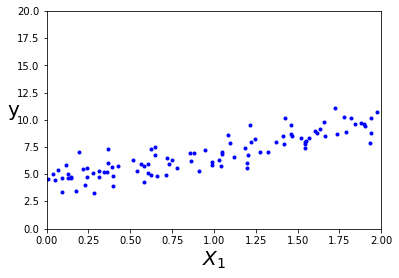

In [6]:
plt.plot(X,y,'b.')
plt.xlabel('$X_1$', fontsize = 20)
plt.ylabel('y', rotation = 0 ,fontsize = 20)
plt.axis([0,2,0,20])
plt.show()

In [7]:
X_b = np.c_[np.ones((100,1)),X]

In [8]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [9]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [10]:
X_new = np.array([[0],[2]])
X_new

array([[0],
       [2]])

In [11]:
# Add x0 = 1 to each instance

X_new_b = np.c_[np.ones((2,1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [12]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

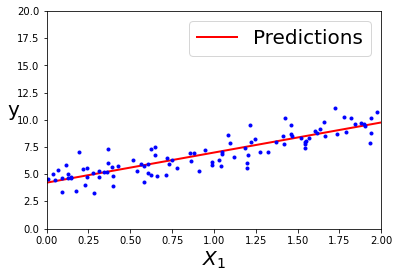

In [13]:
plt.plot(X_new, y_predict, 'r-', linewidth = 2, label='Predictions')
plt.plot(X,y, 'b.')
plt.xlabel('$X_1$', fontsize = 20)
plt.ylabel('y', rotation = 0 ,fontsize = 20)
plt.axis([0,2,0,20])
plt.legend(loc = 'upper right', fontsize = 20)
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [16]:
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [17]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [18]:
eta = 0.1       # learning rate
n_iterations = 10
m = 100
theta = np.random.randn(2,1)
print(theta)
for iterations in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)- y)
    theta = theta - eta*gradients

print('after calculations', theta)

[[0.01300189]
 [1.45353408]]
after calculations [[2.99369522]
 [3.82413043]]


In [19]:
theta

array([[2.99369522],
       [3.82413043]])

In [20]:
def gradient_descent_plot(eta,n_iterations,theta):
    m = len(X_b)
    for iterations in range(n_iterations):
        if iterations<10:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if iterations>0 else 'r--'
            plt.plot(X_new,y_predict,style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta)- y)
        theta = theta - eta*gradients
    plt.plot(X,y,'b.')
    plt.xlabel('$X_1$', fontsize = 20)
    plt.ylabel('y', rotation = 0 ,fontsize = 20)
    plt.title(f'n{eta}')
    plt.axis([0,2,0,20])
    

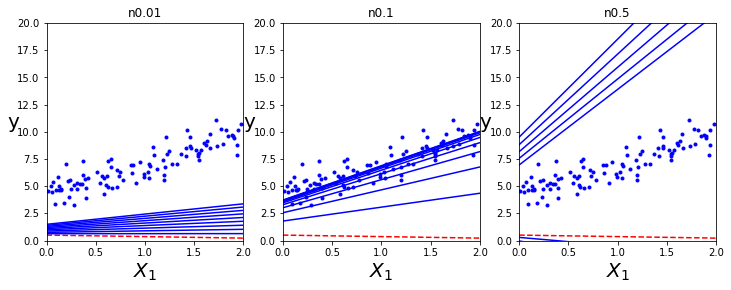

In [21]:
np.random.seed(42)
theta = np.random.randn(2,1)
plt.figure(figsize=(12,4))
plt.subplot(131);gradient_descent_plot(0.01,100,theta)
plt.subplot(132);gradient_descent_plot(0.1,100,theta)
plt.subplot(133);gradient_descent_plot(0.5,100,theta)
plt.show()

In [25]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(eta0 = 0.1, random_state = 42)

In [27]:
sgd_reg.fit(X,y)

SGDRegressor(eta0=0.1, random_state=42)

In [28]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24438563]), array([2.8242988]))

In [29]:
sgd_reg.n_iter_

11

In [31]:
y_predict_sgd = sgd_reg.predict(X_new)
y_predict_sgd

array([4.24438563, 9.89298323])

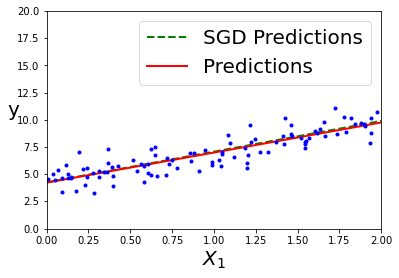

In [33]:
plt.plot(X_new, y_predict_sgd, 'g--', linewidth = 2, label='SGD Predictions')
plt.plot(X_new, y_predict, 'r-', linewidth = 2, label='Predictions')
plt.plot(X,y, 'b.')
plt.xlabel('$X_1$', fontsize = 20)
plt.ylabel('y', rotation = 0 ,fontsize = 20)
plt.axis([0,2,0,20])
plt.legend(loc = 'upper right', fontsize = 20)
plt.show()

In [50]:
data = np.array(X,y)
data.shape

(2, 100, 1)

In [49]:
import pandas as pd

In [51]:
data = pd.DataFrame(X,y)

ValueError: Index data must be 1-dimensional